In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

In [7]:
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from heartdisease',con=engine)

engine.dispose()

In [8]:
# Define the features and the outcome
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [9]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

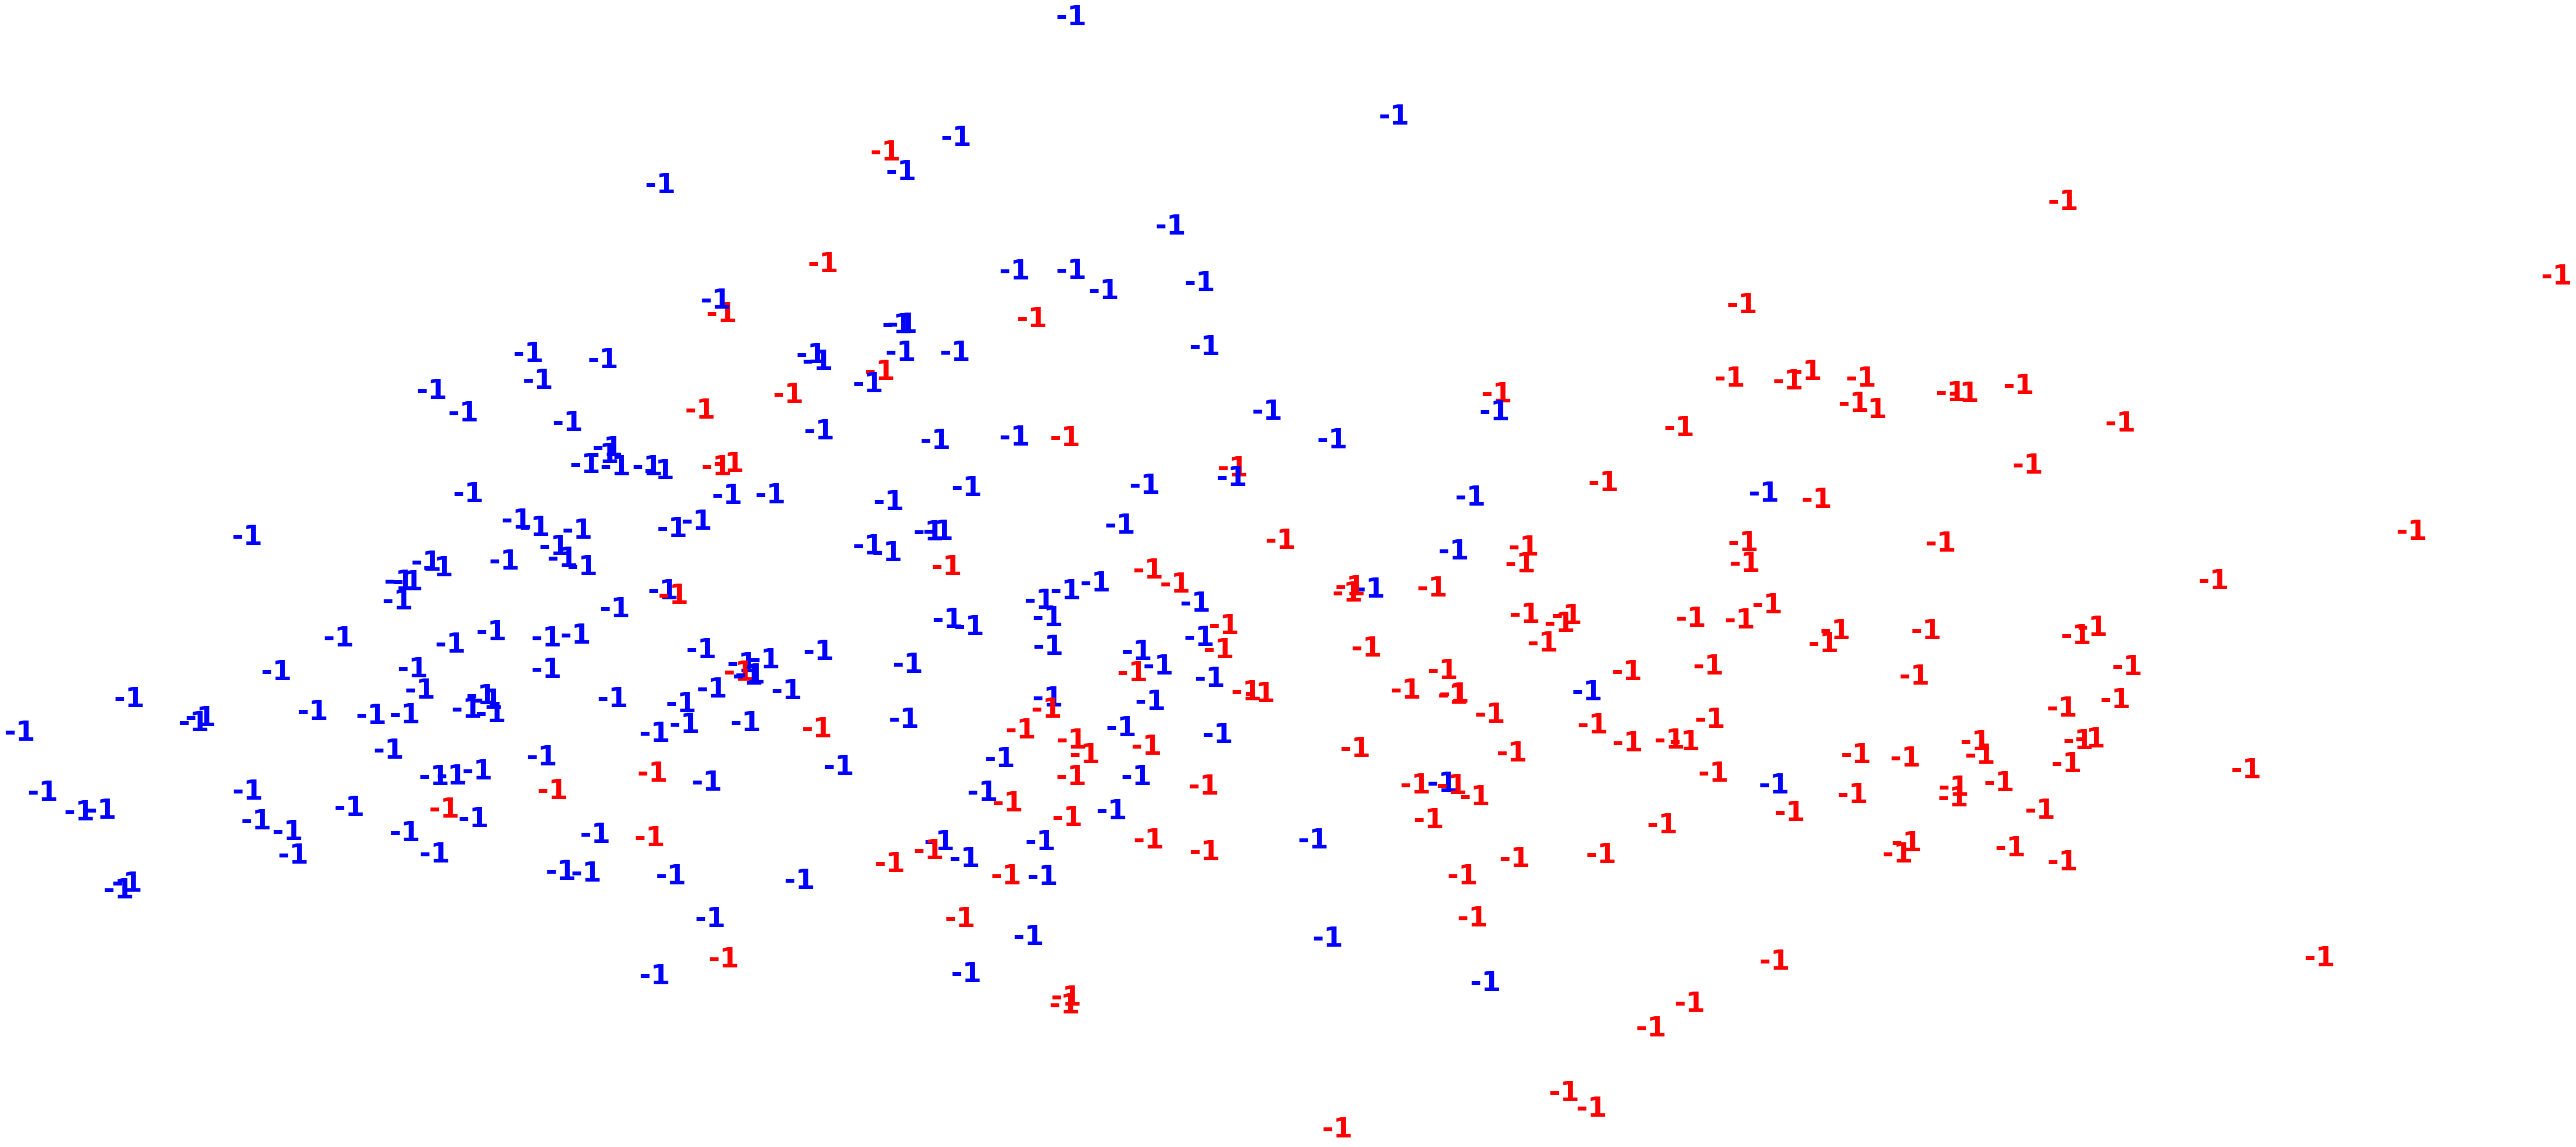

In [14]:
dbscan_cluster = DBSCAN(eps=1, min_samples=5)

# Fit model
y_pred = dbscan_cluster.fit_predict(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(X_pca.shape[0]):
    plt.text(X_pca[i, 0], X_pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

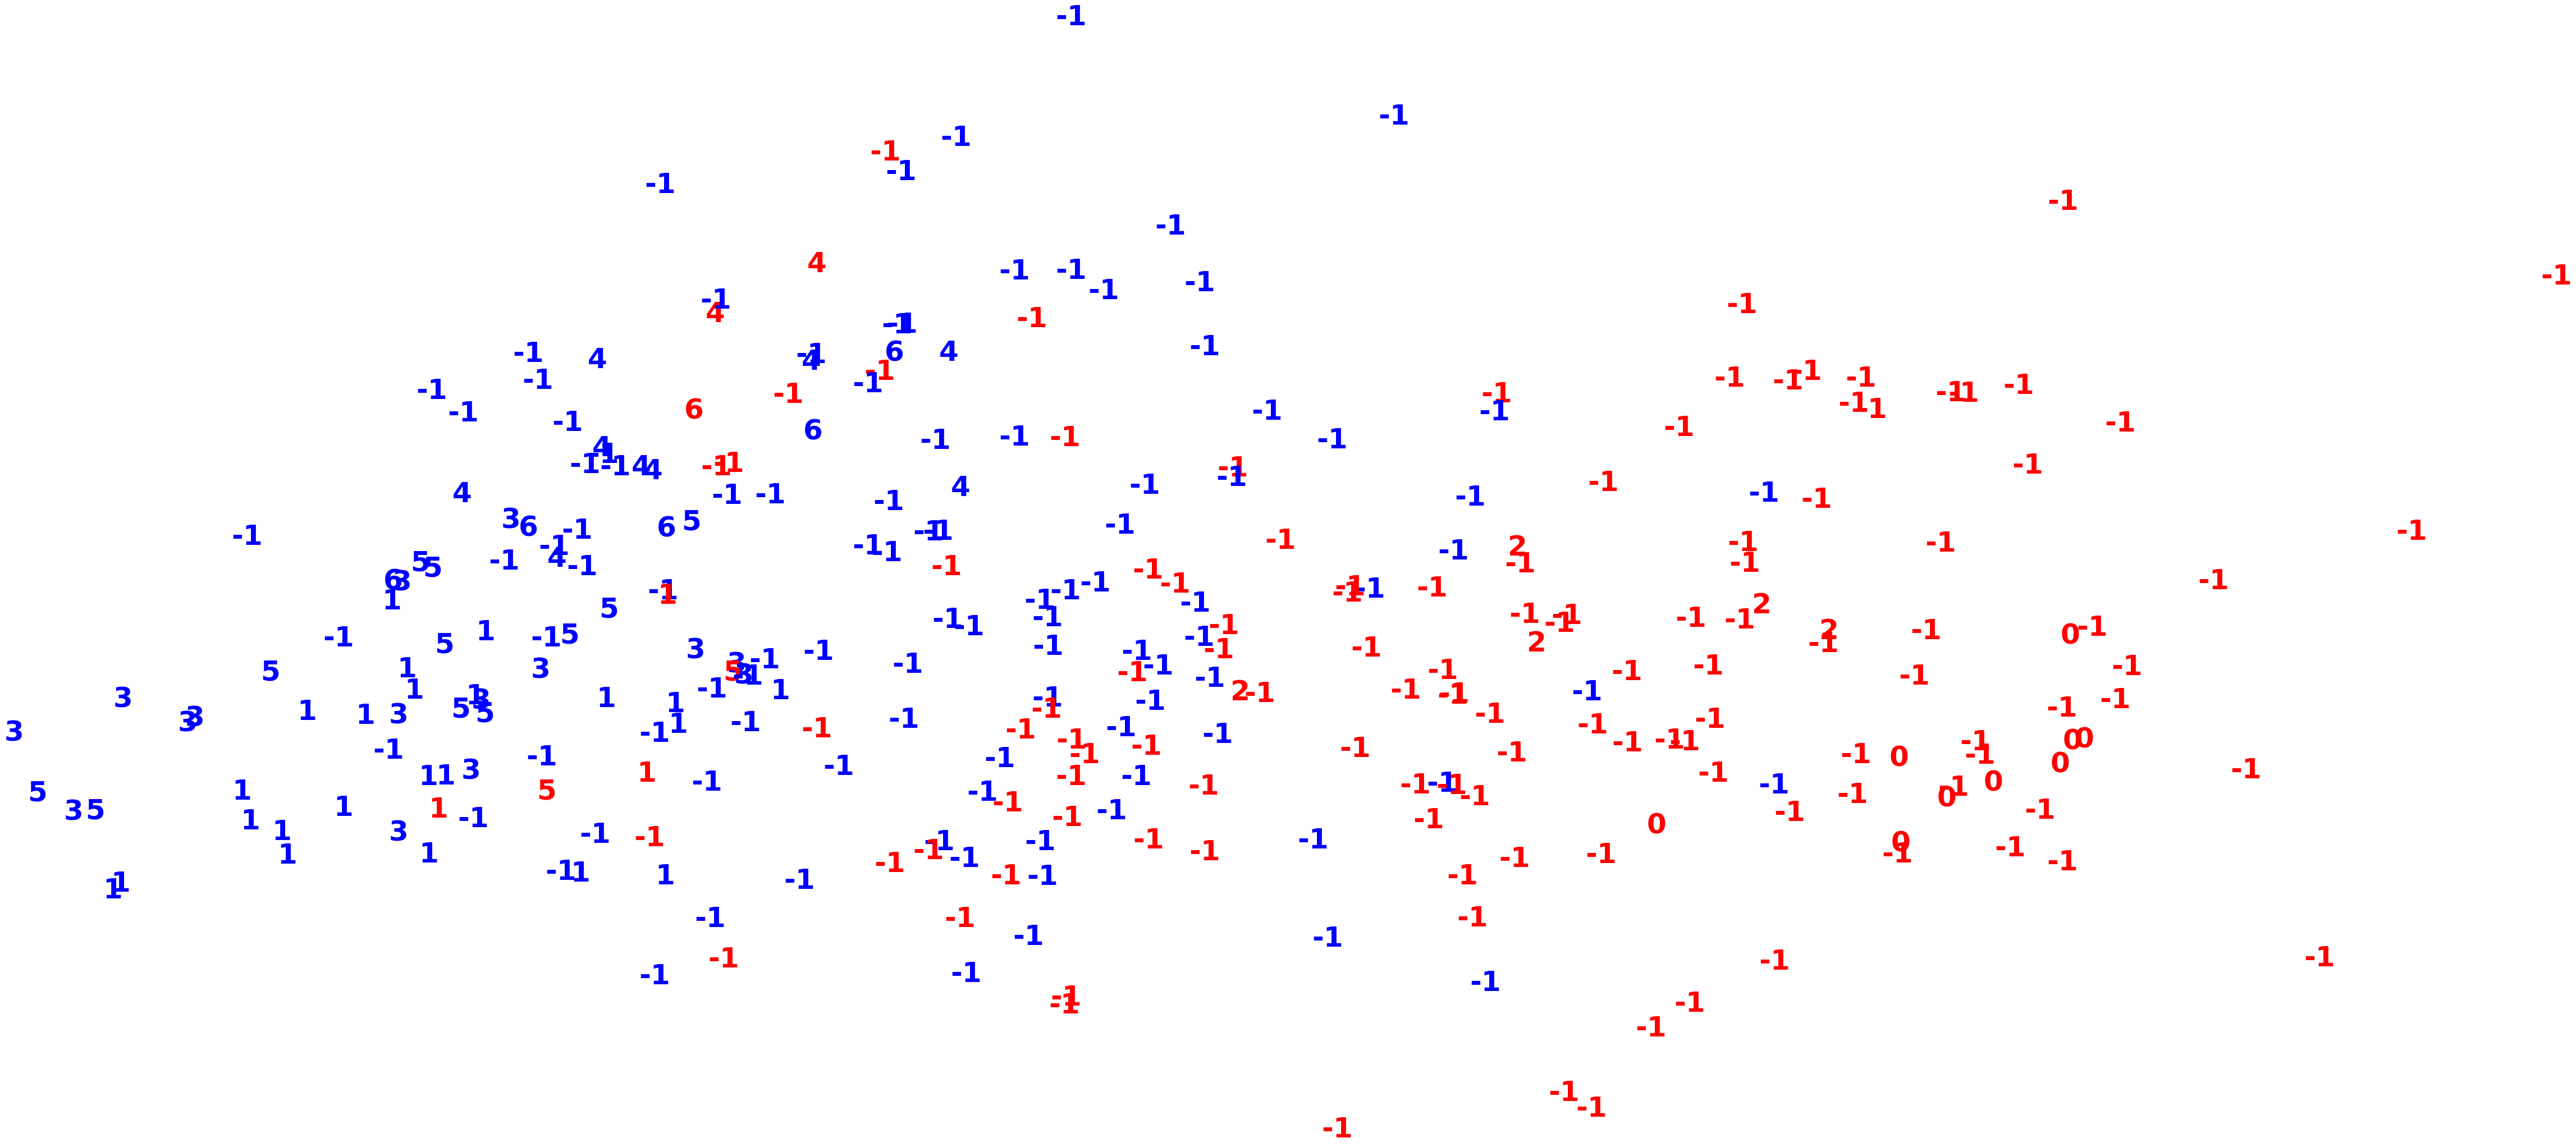

In [15]:
dbscan_cluster = DBSCAN(eps=2, min_samples=5)

# Fit model
y_pred = dbscan_cluster.fit_predict(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(X_pca.shape[0]):
    plt.text(X_pca[i, 0], X_pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

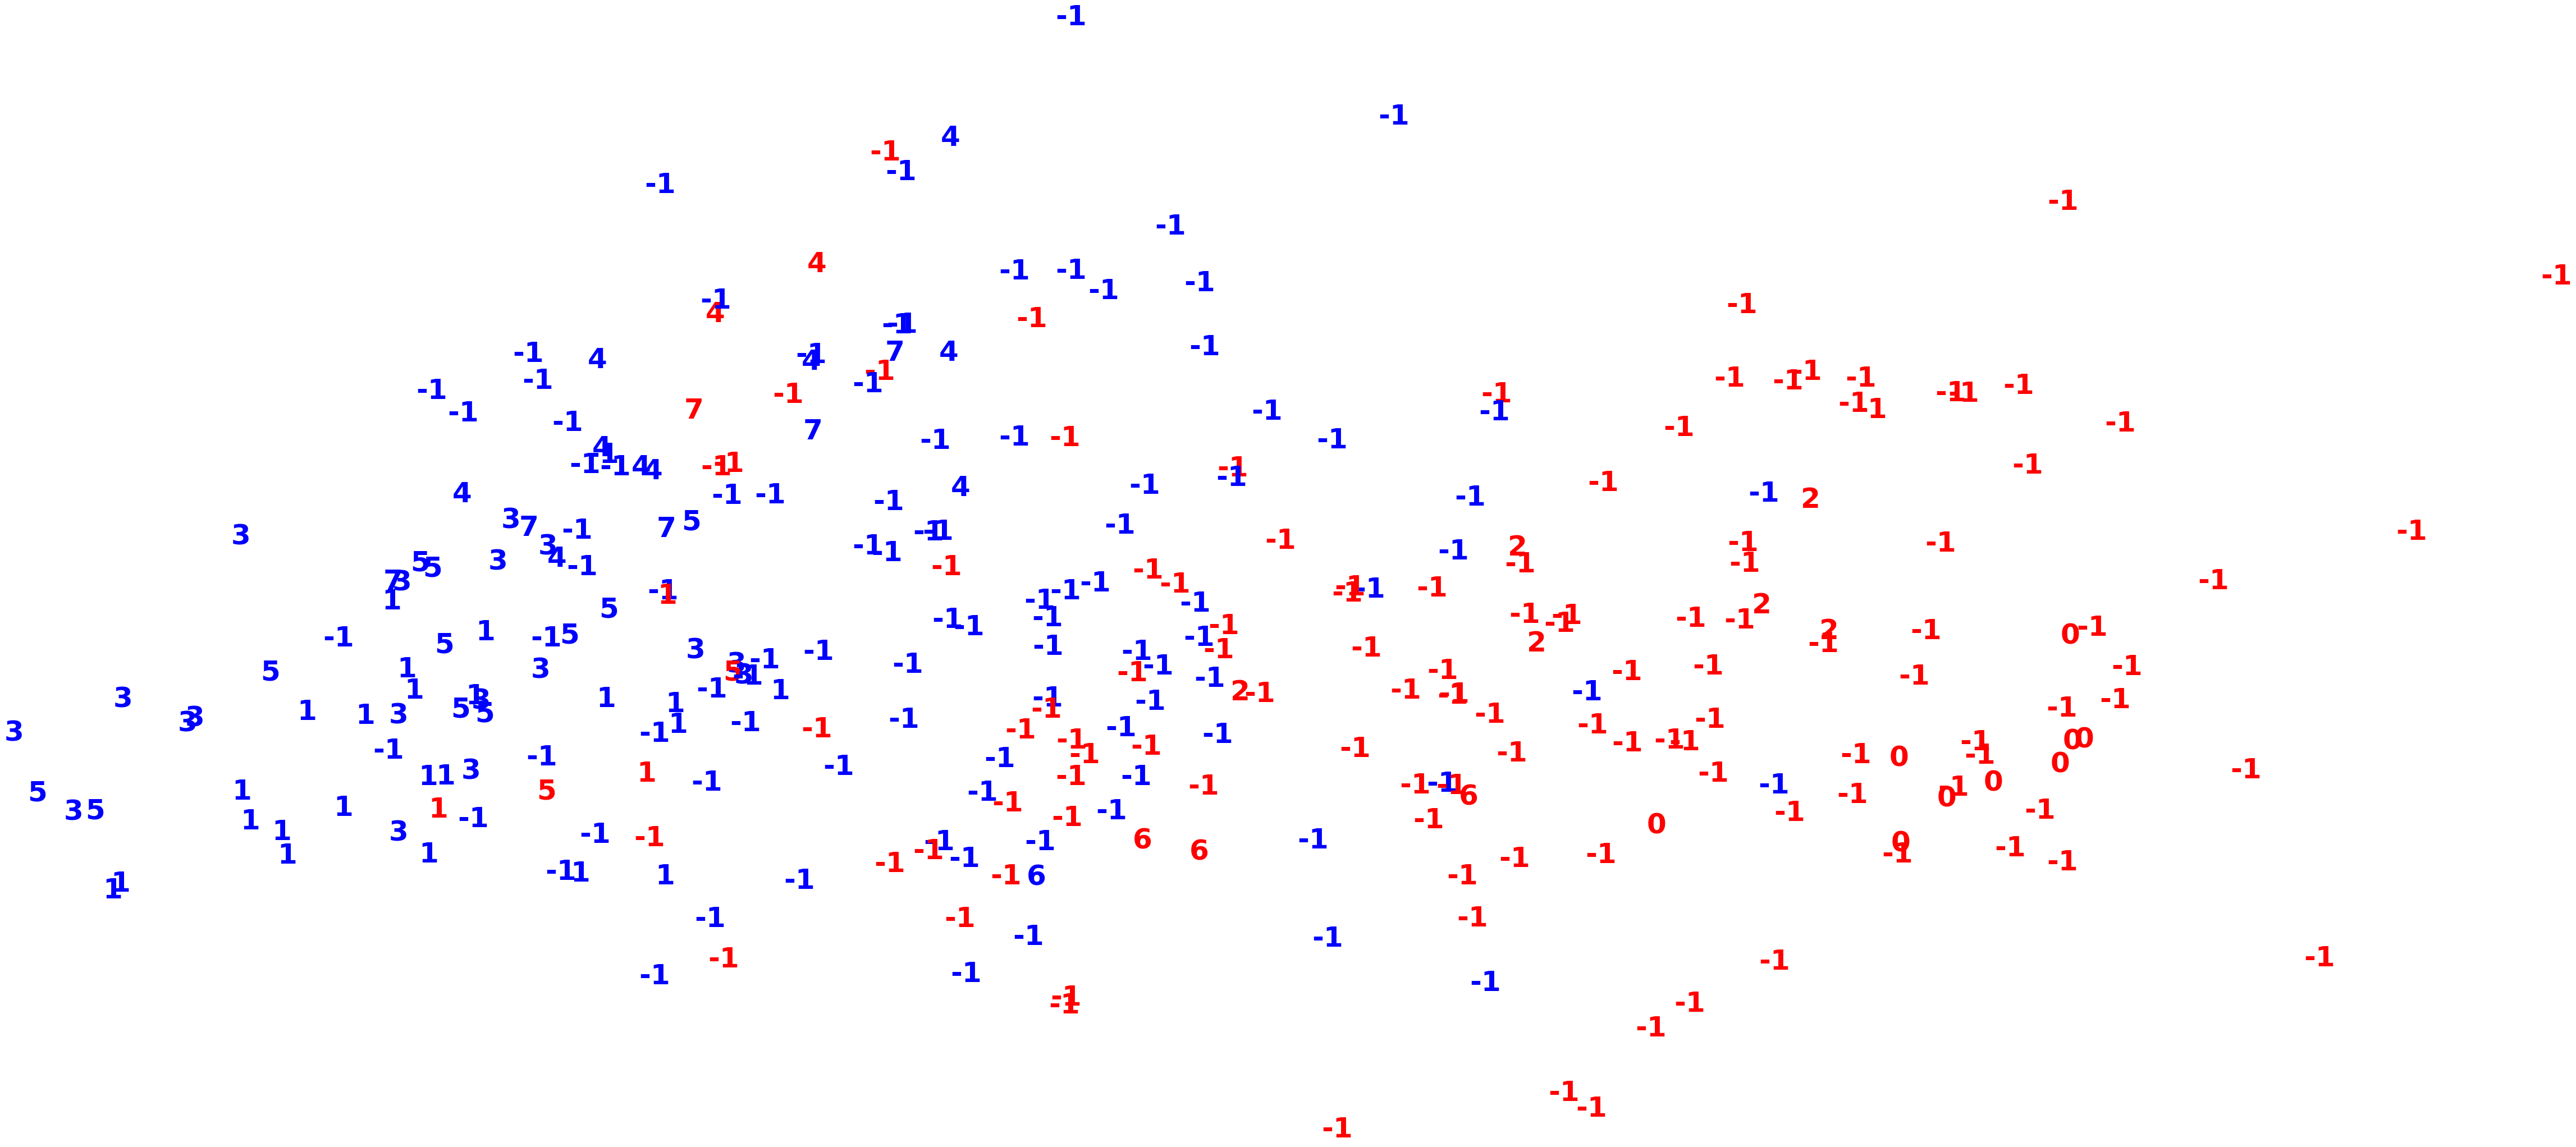

In [16]:
dbscan_cluster = DBSCAN(eps=2, min_samples=4)

# Fit model
y_pred = dbscan_cluster.fit_predict(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(X_pca.shape[0]):
    plt.text(X_pca[i, 0], X_pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

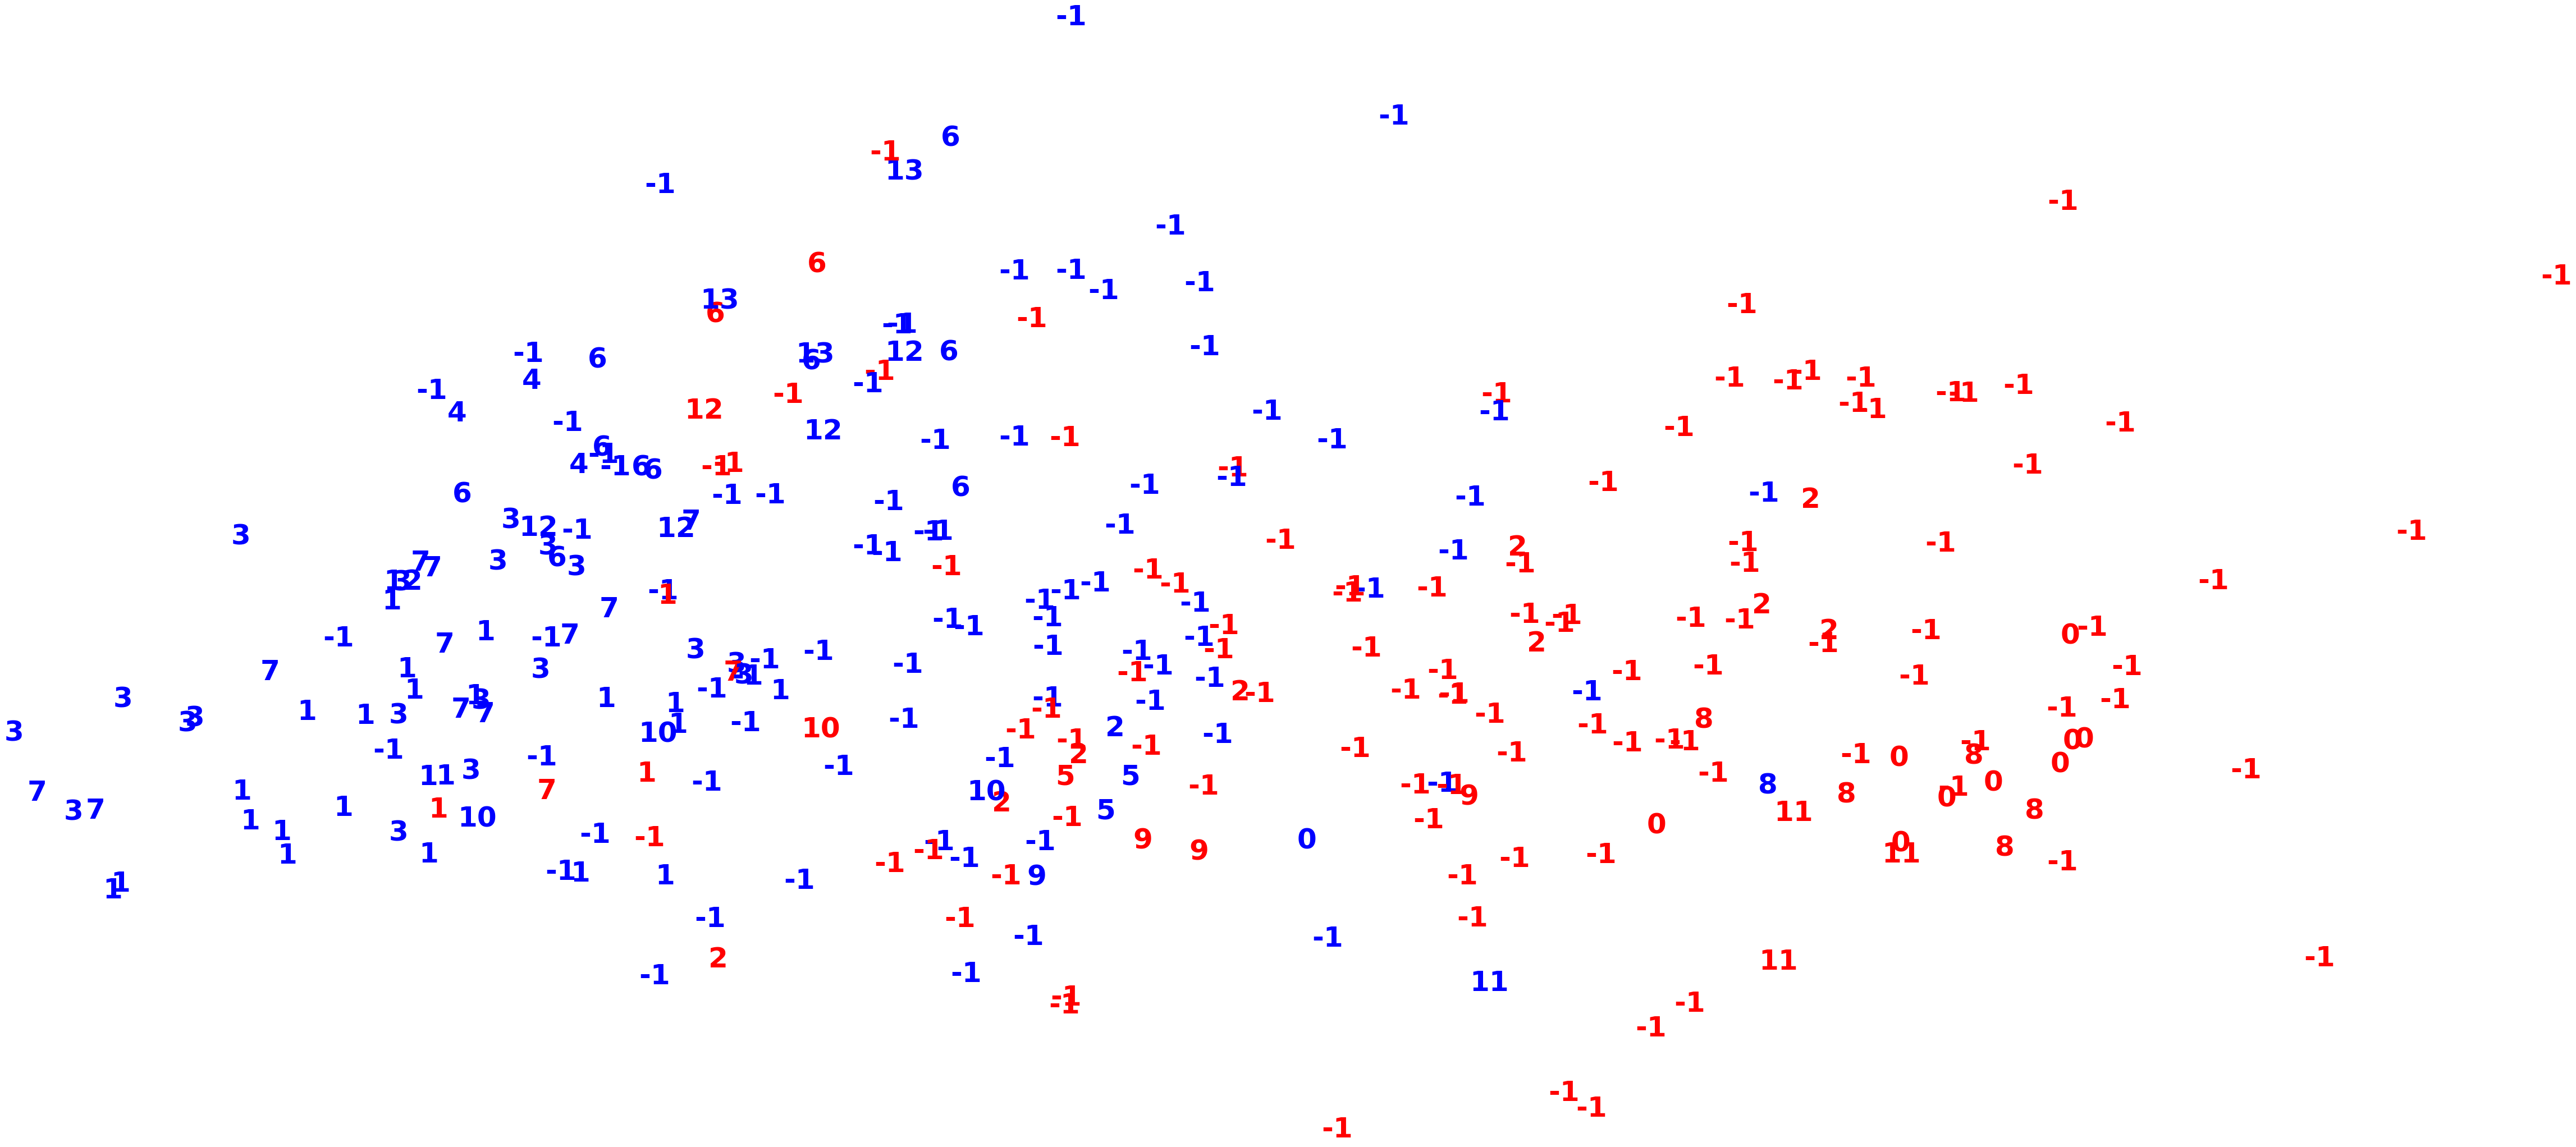

In [17]:
dbscan_cluster = DBSCAN(eps=2, min_samples=3)

# Fit model
y_pred = dbscan_cluster.fit_predict(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(X_pca.shape[0]):
    plt.text(X_pca[i, 0], X_pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [20]:
for i in range(1,21):
    dbscan_cluster = DBSCAN(eps=1, min_samples=i, metric="euclidean")
    y_pred = dbscan_cluster.fit_predict(X_std)
    print("Number of clusters when min_samples={} is: {}".format(i, len(np.unique(y_pred))))

Number of clusters when min_samples=1 is: 294
Number of clusters when min_samples=2 is: 9
Number of clusters when min_samples=3 is: 2
Number of clusters when min_samples=4 is: 1
Number of clusters when min_samples=5 is: 1
Number of clusters when min_samples=6 is: 1
Number of clusters when min_samples=7 is: 1
Number of clusters when min_samples=8 is: 1
Number of clusters when min_samples=9 is: 1
Number of clusters when min_samples=10 is: 1
Number of clusters when min_samples=11 is: 1
Number of clusters when min_samples=12 is: 1
Number of clusters when min_samples=13 is: 1
Number of clusters when min_samples=14 is: 1
Number of clusters when min_samples=15 is: 1
Number of clusters when min_samples=16 is: 1
Number of clusters when min_samples=17 is: 1
Number of clusters when min_samples=18 is: 1
Number of clusters when min_samples=19 is: 1
Number of clusters when min_samples=20 is: 1


With four or more min_samples (eps=1), the data is in one cluster. DBSCAN doesn't seem effective here.

In [21]:
for i in range(1,21):
    dbscan_cluster = DBSCAN(eps=i, min_samples=1, metric="euclidean")
    y_pred = dbscan_cluster.fit_predict(X_std)
    print("Number of clusters when eps={} is: {}".format(i, len(np.unique(y_pred))))

Number of clusters when eps=1 is: 294
Number of clusters when eps=2 is: 178
Number of clusters when eps=3 is: 34
Number of clusters when eps=4 is: 3
Number of clusters when eps=5 is: 1
Number of clusters when eps=6 is: 1
Number of clusters when eps=7 is: 1
Number of clusters when eps=8 is: 1
Number of clusters when eps=9 is: 1
Number of clusters when eps=10 is: 1
Number of clusters when eps=11 is: 1
Number of clusters when eps=12 is: 1
Number of clusters when eps=13 is: 1
Number of clusters when eps=14 is: 1
Number of clusters when eps=15 is: 1
Number of clusters when eps=16 is: 1
Number of clusters when eps=17 is: 1
Number of clusters when eps=18 is: 1
Number of clusters when eps=19 is: 1
Number of clusters when eps=20 is: 1


This is similar to what happened with varying the minimum number of points.